# ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
Frvids = pd.read_csv('FRvideos_Clean.csv')
Frvids = Frvids.drop(columns=['Unnamed: 0'])

In [3]:
Frvids['trending_date'] = pd.to_datetime(Frvids['trending_date'])
Frvids['publish_time'] = pd.to_datetime(Frvids['publish_time'])

In [4]:
Frvids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category_title
0,Ro6eob0LrCY,2017-11-14,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,...,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243),Entertainment
1,Yo84eqYwP98,2017-11-14,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-12-11,[none],432721,14053,576,...,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Corse,41.927065,8.728294,POINT (8.728293821999999 41.92706484),Entertainment
2,WuTFI5qftCE,2017-11-14,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-12-11,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,...,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Moyotte,-12.787089,45.275004,POINT (45.27500362 -12.78708901),Gaming
3,ee6OFs8TdEg,2017-11-14,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,...,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755),Sports
4,teXaL6GdQRk,2017-11-14,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,...,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...,Martinique,14.610412,-61.080029,POINT (-61.08002914 14.6104118),Comedy


In [5]:
# agrupar el dataset por la cantidad de filas que tengan el mismo channel_title
channelCount = Frvids.groupby("channel_title").count()

In [6]:
# los 10 canales con mas videos que han sido tendencia
channelCount.nlargest(10,['video_id'])

,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category_title
channel_title,,,,,,,,,,,,,,,,,,,,
Troom Troom FR,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
Elhiwar Ettounsi,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
sam zirah,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
Marodi TV Sénégal,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
Lama Faché,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
VikatanTV,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
Touche pas à mon poste !,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157
Çukur,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
Topito,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


## 10 Canales que tienen la mayor frecuencia de videos que son tendencia

<BarContainer object of 10 artists>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


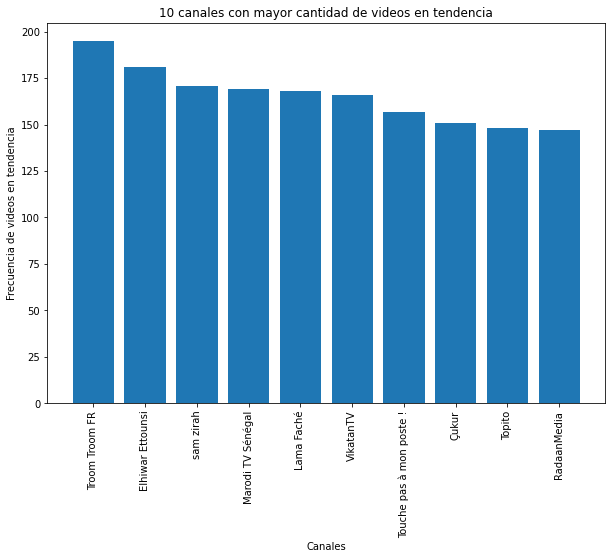

In [7]:
#plt.rcParams["font.family"]="STSong"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(10, 7))
plt.xticks(rotation='vertical')
plt.xlabel('Canales')
plt.ylabel('Frecuencia de videos en tendencia')
plt.title('10 canales con mayor cantidad de videos en tendencia')
plt.bar(channelCount.nlargest(10,['video_id']).index, channelCount.nlargest(10,['video_id'])['video_id'])

## 10 Canales que tienen la menor frecuencia de videos que son tendencia

<BarContainer object of 10 artists>

findfont: Font family ['STSong'] not found. Falling back to DejaVu Sans.


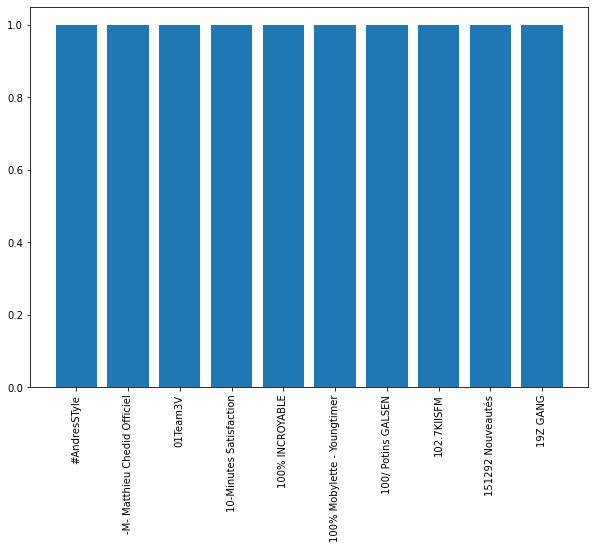

In [8]:
plt.rcParams["font.family"]="STSong"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(10, 7))
plt.xticks(rotation='vertical')
plt.bar(channelCount.nsmallest(10,['video_id']).index, channelCount.nsmallest(10,['video_id'])['video_id'])

La visualizacion previa de los canales con menos videos en tendencia no es muy interesante, ya que todos tienen solo un video. Por lo tanto, vamos a mostrar a que categoria pertenecen los 200 canales con menos videos en tendencia.

In [9]:
Frvids = Frvids.set_index('channel_title')

findfont: Font family ['STSong'] not found. Falling back to DejaVu Sans.


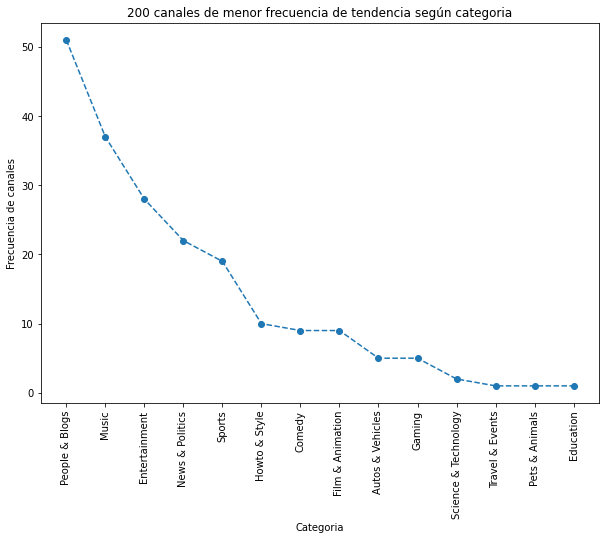

In [10]:
#Frvids = Frvids.set_index('channel_title')
LeastTrend = Frvids.loc[channelCount.nsmallest(200,['video_id']).index]['category_title']
LeastTrend = LeastTrend.value_counts()
plt.rcParams["font.family"]="STSong"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(10, 7))
plt.xticks(rotation='vertical')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia de canales')
plt.title('200 canales de menor frecuencia de tendencia según categoria')
plt.plot(LeastTrend.index, LeastTrend.values, marker='o', linestyle='--')